In [1]:
import numpy as np
import pandas as pd

In [30]:
data = pd.read_csv('../data/TrueFX/EUR-USD/datos_procesados_5T_EURUSD-2018-01.csv',index_col=0,
                  infer_datetime_format=True, parse_dates=True)

In [3]:
data.head()

,bid,ask
2018-01-02 00:00:00,1.20015,1.20110
2018-01-02 00:05:00,1.20047,1.20084
2018-01-02 00:10:00,1.20082,1.20126
2018-01-02 00:15:00,1.20035,1.20091
2018-01-02 00:20:00,1.20049,1.20085


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = data.dropna()

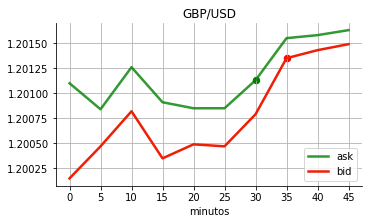

In [6]:
plt.figure(figsize=(5.5,3))
ax = plt.axes()
ax.spines['right'].set_visible(False)
plt.title('GBP/USD')
plt.xlabel('minutos')
plt.grid()
ax.spines['top'].set_visible(False)
plt.plot(np.arange(10),data.ask[:10], color='green', linewidth=2.5, alpha=.8, label='ask')
plt.plot(np.arange(10),data.bid[:10], color='#EF1F07', linewidth=2.5, label='bid')
plt.legend(loc='lower right')
plt.scatter(6,data.ask[6], color='green', linewidths=1.5)
plt.scatter(7,data.bid[7], color='red', linewidths=1.5)
#plt.ylim(1.2,1.2017)
plt.xticks(np.arange(10), data.index.minute[:10]);
#ax.yaxis.grid(True, which='major')

In [7]:
data.ask[6], data.bid[6]

(1.20113, 1.20079)

### para las series financieras

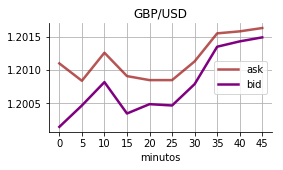

In [8]:
plt.figure(figsize=(4,2))
ax = plt.axes()
ax.spines['right'].set_visible(False)
plt.title('GBP/USD')
plt.grid()
plt.xlabel('minutos')
ax.spines['top'].set_visible(False)
plt.plot(np.arange(10),data.ask[:10], color='brown', linewidth=2.5, alpha=.8, label='ask')
plt.plot(np.arange(10),data.bid[:10], color='purple', linewidth=2.5, label='bid')
plt.legend(loc='center right')
#plt.ylim(1.2,1.2017)
plt.xticks(np.arange(10), data.index.minute[:10]);
#ax.yaxis.grid(True, which='major')

In [4]:
data_1 = pd.read_csv('../data/TrueFX/EUR-USD/EURUSD-2018-01.csv', parse_dates=True, index_col=1,
                     infer_datetime_format=True, names=['ref','bid','ask'])

In [33]:
data_1.shape

(3952896, 3)

In [7]:
data = data.dropna()

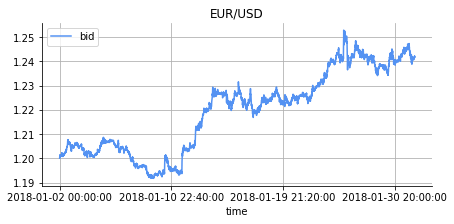

In [24]:
plt.figure(figsize=(7,3))
ax = plt.axes()
ax.spines['right'].set_visible(False)
plt.title('EUR/USD')
plt.grid()
plt.xlabel('time')
ax.spines['top'].set_visible(False)
plt.plot(np.arange(data.shape[0]),data.bid, color='#5492F2', linewidth=1.5, label='bid')
plt.legend(loc='upper left');
#plt.ylim(1.2,1.2017)
plt.xticks(([0,2000,4000,6000]),([data.index[0],data.index[2000],data.index[4000],data.index[6000]]));

In [31]:
%run ../code/build_dataset.py

data, target = build_dataset(data, window=7)

In [32]:
data.head()

,0,1,2,3,4,5,6
2018-01-02 00:30:00,1.20015,1.20047,1.20082,1.20035,1.20049,1.20047,1.20079
2018-01-02 00:35:00,1.20047,1.20082,1.20035,1.20049,1.20047,1.20079,1.20135
2018-01-02 00:40:00,1.20082,1.20035,1.20049,1.20047,1.20079,1.20135,1.20143
2018-01-02 00:45:00,1.20035,1.20049,1.20047,1.20079,1.20135,1.20143,1.20149
2018-01-02 00:50:00,1.20049,1.20047,1.20079,1.20135,1.20143,1.20149,1.20133


In [33]:
target

array([ 1.20135,  1.20143,  1.20149, ...,  1.2422 ,  1.24175,  1.24168])

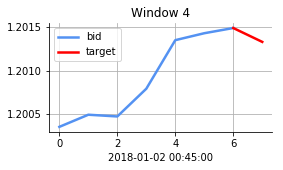

In [59]:
plt.figure(figsize=(4,2))
ax = plt.axes()
ax.spines['right'].set_visible(False)
plt.grid()
i = 3
plt.title('Window '+str(i+1))
plt.xlabel(data.index[i])
ax.spines['top'].set_visible(False)
plt.plot(np.arange(7),data.iloc[i,:], color='#5492F2', linewidth=2.5, label='bid')
plt.plot(np.arange(8),list(np.zeros(6)*np.nan) + list([data.iloc[i,-1],target[i]])
         ,color='red',linewidth=2.5, label='target');
plt.legend(loc='upper left');

In [6]:
data.shape

(6361, 2)

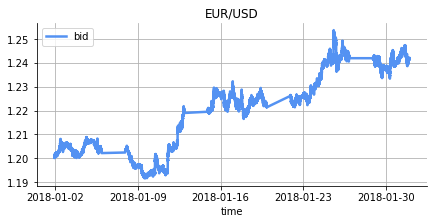

In [10]:
plt.figure(figsize=(7,3))
ax = plt.axes()
ax.spines['right'].set_visible(False)
plt.title('EUR/USD')
plt.grid()
plt.xlabel('time')
ax.spines['top'].set_visible(False)
plt.plot(data_1.index,data_1.bid, color='#5492F2', linewidth=2.5, label='bid')
plt.legend(loc='upper left');
#plt.ylim(1.2,1.2017)
#plt.xticks(np.arange(10), data.index.minute[:10]);

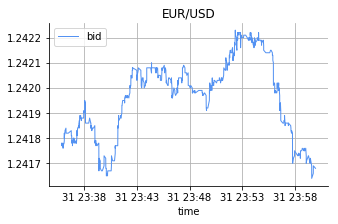

In [49]:
plt.figure(figsize=(5,3))
ax = plt.axes()
ax.spines['right'].set_visible(False)
plt.title('EUR/USD')
plt.grid()
plt.xlabel('time')
ax.spines['top'].set_visible(False)
plt.plot(data_1.index[int(3.951999*10**6):],data_1.bid[int(3.951999*10**6):]
         , color='#5492F2', linewidth=1, label='bid')
plt.legend(loc='upper left');

In [51]:
data_1 = data_1.bid.resample('5T',loffset='5T').last()

In [52]:
data_1.shape

(8664,)

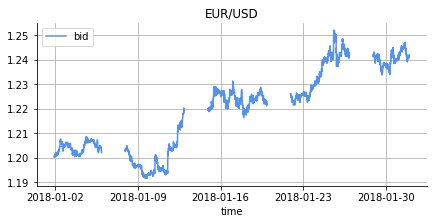

In [55]:
plt.figure(figsize=(7,3))
ax = plt.axes()
ax.spines['right'].set_visible(False)
plt.title('EUR/USD')
plt.grid()
plt.xlabel('time')
ax.spines['top'].set_visible(False)
plt.plot(data_1.index,data_1, color='#5492F2', label='bid')
plt.legend(loc='upper left');

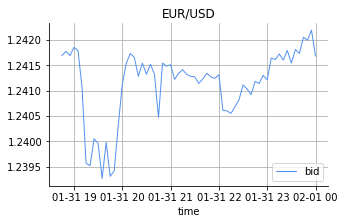

In [60]:
plt.figure(figsize=(5,3))
ax = plt.axes()
ax.spines['right'].set_visible(False)
plt.title('EUR/USD')
plt.grid()
plt.xlabel('time')
ax.spines['top'].set_visible(False)
plt.plot(data_1.index[8600:],data_1[8600:],color='#5492F2', linewidth=1, label='bid')
plt.legend(loc='lower right');

In [102]:
data_1.shape

(3952896, 3)

In [75]:
data_1.head()

,ref,bid,ask
2018-01-01 22:01:01.051,EUR/USD,1.20094,1.20116
2018-01-01 22:01:01.158,EUR/USD,1.20093,1.20115
2018-01-01 22:01:11.676,EUR/USD,1.20093,1.20111
2018-01-01 22:01:18.116,EUR/USD,1.20082,1.20111
2018-01-01 22:01:32.023,EUR/USD,1.20043,1.20070


In [76]:
data_2 = data_1.bid.resample('5T', loffset='5T').mean()
data_1 = data_1.bid.resample('5T', loffset='5T').ohlc()

In [77]:
data_1.head()

,open,high,low,close
2018-01-01 22:05:00,1.20094,1.20094,1.20011,1.20030
2018-01-01 22:10:00,1.20026,1.20097,1.20011,1.20096
2018-01-01 22:15:00,1.20093,1.20098,1.20069,1.20095
2018-01-01 22:20:00,1.20095,1.20097,1.20025,1.20056
2018-01-01 22:25:00,1.20056,1.20056,1.20048,1.20052


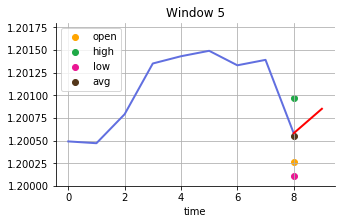

In [81]:
plt.figure(figsize=(5,3))
ax = plt.axes()
ax.spines['right'].set_visible(False)
plt.title('GBP/USD')
plt.grid()
plt.xlabel('minutos')
ax.spines['top'].set_visible(False)
plt.title('Window 5')
plt.xlabel('time')
plt.scatter(8,data_1.open[1], color='orange',label='open')
plt.scatter(8,data_1.high[1], color='#1EA946',label='high')
plt.scatter(8,data_1.low[1], color='#EA1693',label='low')
plt.scatter(8,data_2[1], color='#54371A',label='avg')
plt.plot(np.arange(9),data.bid[4:13],color='#616FE0', linewidth=2,label='')
plt.plot(np.arange(10),list(np.zeros(8)*np.nan) + list([data.bid[12],data.bid[13]]),color='red',linewidth=2);
plt.legend()
plt.ylim(1.2, 1.2018);

In [83]:
%run ../code/build_dataset.py

In [93]:
a,_ = build_dataset(data, window=7)

In [94]:
a.head()

,0,1,2,3,4,5,6
2018-01-02 00:30:00,1.20015,1.20047,1.20082,1.20035,1.20049,1.20047,1.20079
2018-01-02 00:35:00,1.20047,1.20082,1.20035,1.20049,1.20047,1.20079,1.20135
2018-01-02 00:40:00,1.20082,1.20035,1.20049,1.20047,1.20079,1.20135,1.20143
2018-01-02 00:45:00,1.20035,1.20049,1.20047,1.20079,1.20135,1.20143,1.20149
2018-01-02 00:50:00,1.20049,1.20047,1.20079,1.20135,1.20143,1.20149,1.20133
